# Logistic map

Solution to [Logistic map](../Logistic_map.ipynb)


First we load the necessary modules

In [21]:
using Statistics
using PyPlot

These two functions solve the logistic map equation. The special string at the beginning explains how to use the function (strickly speaking, it is no necessary, but it is good practice to do so).

In [22]:
"""
   logistic_map!(x0,r,isave,xsave)

Solve the logistic map equation: xₙ₊₁ = r xₙ (1 - xₙ)
`x0` is the initial condition (between 0 and 1), `r` is the parameter controlling the growth of the population,
`isave` a range of indices to save the solution, `xsave` are preallocated array for the solution.

"""
function logistic_map!(x0,r,isave,xsave)
    x = x0
    for i = 1:maximum(isave)
      if i in isave
            xsave[i - isave[1] + 1] = x
      end

      x = r*x*(1-x)
    end
    return xsave
end

"""
    xsave = logistic_map(x0,r,isave)

Solve the logistic map equation xₙ₊₁ = r xₙ (1 - xₙ).

`x0` is the initial condition (between 0 and 1), `r` is the parameter controlling the growth of the population,
`isave` a range of indices to save the solution. The solution is return as `xsave`.

"""
logistic_map(x0,r,isave) = logistic_map!(x0,r,isave,zeros(length(isave)))

            


logistic_map

With `?logistic_map` we can see the documentation of any function.

In [23]:
?logistic_map

search: logistic_map logistic_map!



```
xsave = logistic_map(x0,r,isave)
```

Solve the logistic map equation xₙ₊₁ = r xₙ (1 - xₙ).

`x0` is the initial condition (between 0 and 1), `r` is the parameter controlling the growth of the population, `isave` a range of indices to save the solution. The solution is return as `xsave`.


Small difference in the initial condition, yet large difference in the resulting solution (chaos)

In [24]:

x1 = logistic_map(0.2,3.75,1:50)
x2 = logistic_map(0.200001,3.75,1:50)

mean(abs.(x1 - x2))
sqrt(mean((x1 - x2).^2))


0.14453246166031664

Let's plot the two solutions

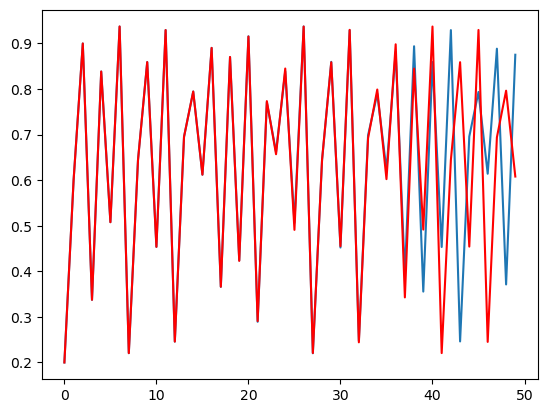

In [25]:
plot(x1)
plot(x2,"r");

Intially they are the same, after after some time they start to be very different

It is quite interesting to try different values of $r$ and to observe the different type of solution.

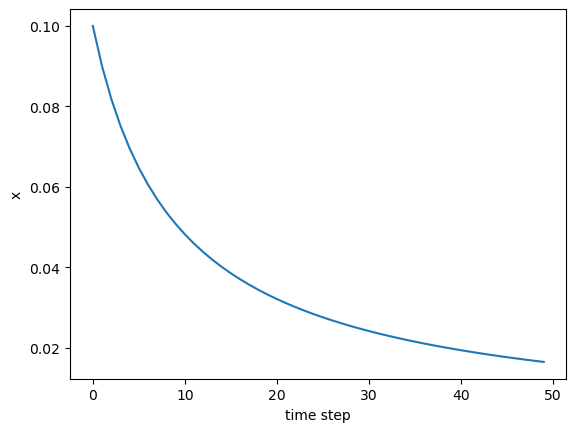

In [26]:
x1 = logistic_map(0.1,1,1:50)
plot(x1)
xlabel("time step")
ylabel("x");


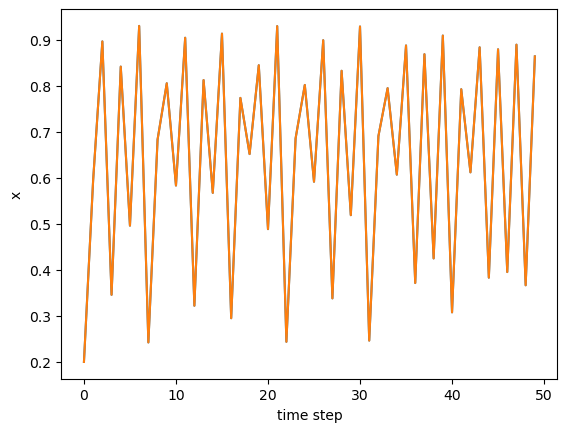

In [27]:
x1 = logistic_map(0.2,3.72,1:50)
plot(x1)
plot(x1)
xlabel("time step")
ylabel("x");


Let's save the last value of the solution after 1000 time step for different values of $r$ and repeat this $N$ times ($N=1000$) (as for for values of $r$ the solution does not converge to a single value).  

In [28]:
rvalues = 2.4:0.001:4
N = 1000
x = zeros(length(rvalues),N)
for i = 1:length(rvalues)
    for j = 1:N
      x[i,j] = logistic_map(rand(),rvalues[i],1000:1000)[1]
    end
end


Make the bifurcation diagram

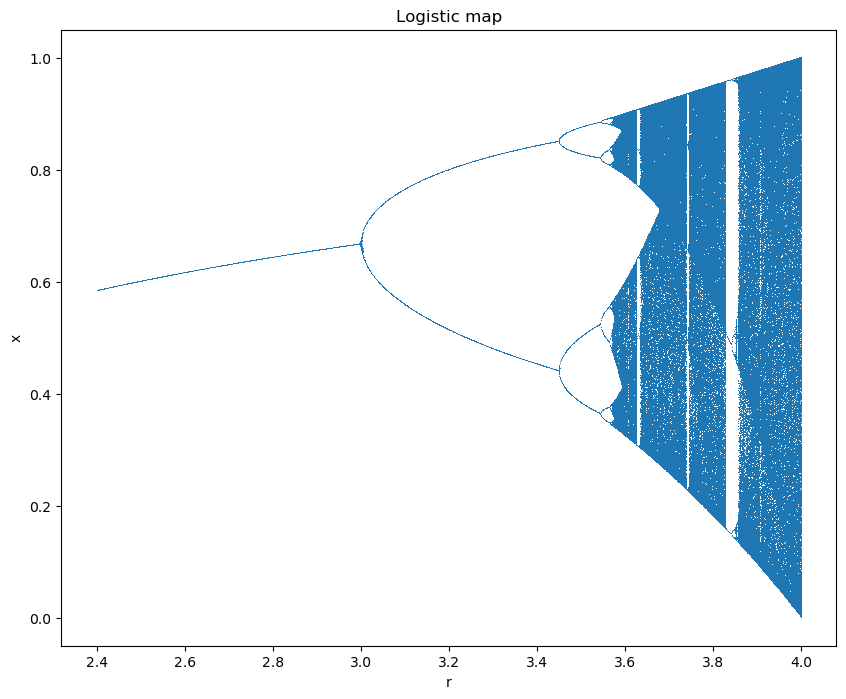

In [31]:
figure(figsize=(10,8))
R = repeat(rvalues,inner=(1,N));
plot(R[:],x[:],",",markersize = 0.1)
xlabel("r")
ylabel("x")
title("Logistic map");
#xlim(3.4,3.6)

* For $r < 3$, the solution will converge to $\frac{r-1}{r}$
* For $3 <= r < 3.44949$, the solution oscillates between between two values
* For $3.44949 < r < 3.54409 $, the solution oscillates between between four values
* With $r$ increasing beyond 3.54409, from almost all initial conditions the population will approach oscillations among 8 values, then 16, 32, etc. 
* Notice the so called "islands of stability". For instance, beginning at $r = 1 + \sqrt{8}$ (approximately 3.82843) there is a range of parameters r that show oscillation among three values (then 6 values, then 12 etc.)


As the solution is close to periodic, is it useful to plot the Fourier spectrum of the solution for different values of $r$.

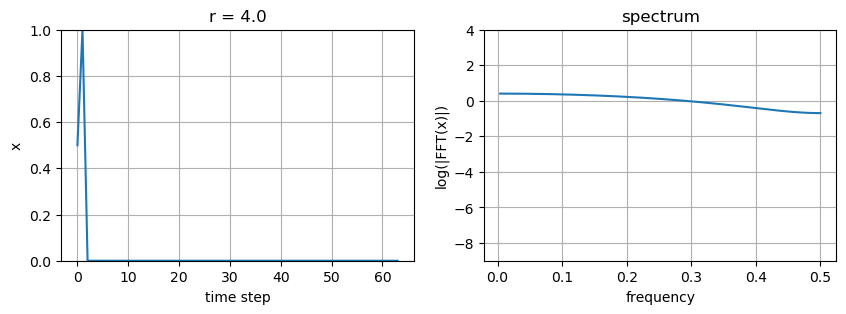

In [32]:
using FFTW
r = 3.26
r = 3.4

x0 = 0.5

fig = figure(figsize=(10,3))

for r = 2:0.02:4
   x1 = logistic_map(x0,r,1:256)

   subplot(1,2,1);
   plot(x1[1:64])
   xlabel("time step")
   ylabel("x")
   title("r = $r")
   ylim(0,1)
   grid("on")

   subplot(1,2,2);
   frequency = (1:(length(x1)÷2)) ./ length(x1)
   plot(frequency,log.(abs.(fft(x1)[2:(end÷2+1)]))  )
   grid("on")
   xlabel("frequency")
   ylabel("log(|FFT(x)|)")
   ylim(-9,4)
   title("spectrum")

    #sleep(0.1)
   IJulia.clear_output(true)
   display(fig)
   clf()
end

# References

Logistic map:  https://en.wikipedia.org/wiki/Logistic_map
